In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import csv 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint
import requests
import time
import gmaps
import os

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



In [2]:
cities_path = "cities.csv"

In [3]:
cities_df = pd.read_csv('cities.csv')
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [4]:
cities_df.to_html("table.html", index=False, classes=["table","table-striped","table-hover"])

In [5]:
table

NameError: name 'table' is not defined

In [6]:
pd injury = pd.read_csv('C:\\Users\\Apple\\Desktop\\injury1.csv', encoding="ISO-8859-1",index_col=0) 

 injury.to_html('injury.html')

SyntaxError: invalid syntax (<ipython-input-6-0a5e7257694d>, line 1)

In [7]:
cities_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


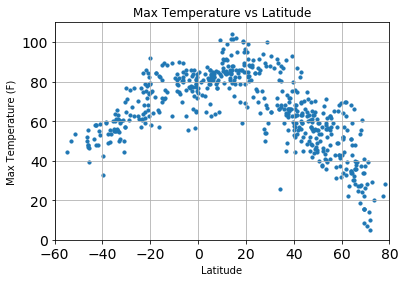

In [8]:
#Temperature vs Latitude scatterplot
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']
plt.scatter(x_axis, y_axis, s=10)
plt.title("Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([-60,80, 0, 110])
plt.grid()
plt.savefig('Max Temp vs Latitude.png')

plt.show()

Temperature vs Latitude scatterplot shows that the higher temperatures (>70 degrees F) are in between -25 and 25 degrees in latitude.

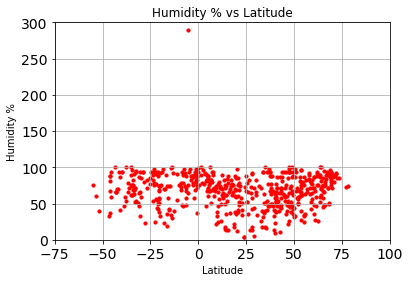

In [9]:
#Humidity% vs Latitude scatterplot
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']
plt.scatter(x_axis, y_axis, c='red', s=10)
plt.title("Humidity % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([-75,100, 0, 300])
plt.grid()

plt.savefig('Humidity vs Latitude.png')

plt.show()

Humidity% vs Latitude scatterplot shows that higher humidity percentages are in between -25 and 25 degrees in latitude.

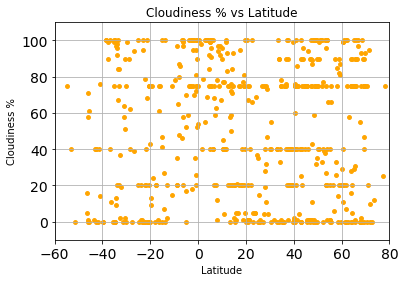

In [10]:
#Cloudiness vs Latitude scatterplot
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']
plt.scatter(x_axis, y_axis, c='orange', s=15)
plt.title("Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([-60,80, -10, 110])
plt.savefig('Cloudiness % vs Latitude.png')
plt.grid()

plt.show()

Cloudiness % vs Latitude scatterplot shows cloudiness percentage is consistent between -50 and 75 degrees latitude. 

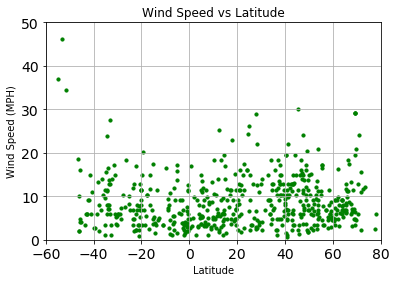

In [11]:
#Wind Speed vs Latitude scatterplot
x_axis = cities_df['Lat']
y_axis = cities_df['Wind Speed']
plt.scatter(x_axis, y_axis, c='green', s=10)
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([-60,80, 0,50])
plt.grid()
plt.savefig('Wind Speed (MPH) vs Latitude.png')
plt.show()

Wind Speed vs Latitude scatterplot shows that most of the recorded cities have wind speeds between 0 and 20 mph despite the latitude. 

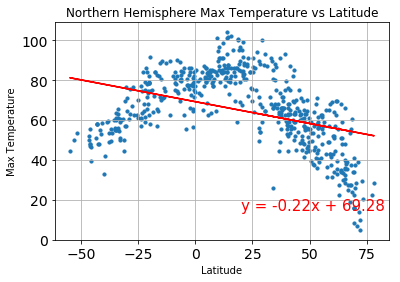

The r-squared is: -0.39360633693822006


In [46]:
#Northern Hemisphere Temperature vs Latitude Regression 
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Max Temp'].astype('float')
plt.scatter(x_axis, y_axis, s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.title("Northern Hemisphere Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.savefig('Northern Hemisphere Temperature vs Latitude Regression.png')
plt.show()

# Print r square value
print(f"The r-squared is: {rvalue}")

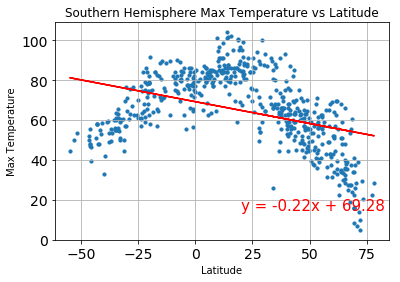

The r-squared is: -0.39360633693822006


In [47]:
#Southern Hemisphere Temperature vs Latitude Regression 
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Max Temp'].astype('float')
plt.scatter(x_axis, y_axis, s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.title("Southern Hemisphere Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.savefig('Southern Hemisphere Temperature vs Latitude Regression.png')
plt.show()


# Print r square value
print(f"The r-squared is: {rvalue}")

In [14]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

0      54.376547
1      73.745547
2      52.311776
3      60.362851
4      76.705856
         ...    
543    61.838626
544    64.019445
545    58.405369
546    58.094449
547    63.207112
Name: Lat, Length: 548, dtype: float64


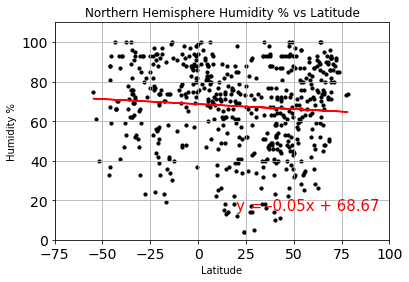

The r-squared is: -0.0717348620176925
If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation, in this case, there is a weak correlation between latitude and the Northern Hemisphere humitidy


In [48]:
#Northern Hemisphere Humidity% vs Latitude scatterplot
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Humidity'].astype('float')
plt.scatter(x_axis, y_axis, c='black', s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.title("Northern Hemisphere Humidity % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([-75,100, 0, 110])
plt.grid()
plt.savefig('Northern Hemisphere Humidity vs Latitude Regression.png')
plt.show()

# Print r square value
print(f"The r-squared is: {rvalue}")
print(f"If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation, in this case, there is a weak correlation between latitude and the Northern Hemisphere humitidy")

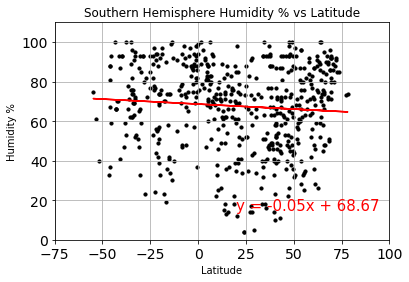

The r-squared is: -0.0717348620176925


In [49]:
#Southern Hemisphere Humidity% vs Latitude scatterplot
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Humidity'].astype('float')
plt.scatter(x_axis, y_axis, c='black', s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


plt.title("Southern Hemisphere Humidity % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([-75,100, 0, 110])
plt.grid()
plt.savefig('Southern Hemisphere Humidity vs Latitude Regression.png')
plt.show()

# Print r square value
print(f"The r-squared is: {rvalue}")

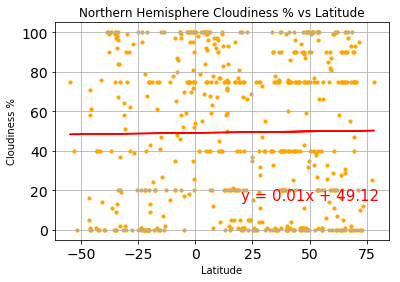

The r-squared is: 0.013225145468481015


In [50]:
#Northern Hemisphere Cloudiness vs Latitude scatterplot
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Cloudiness'].astype('float')
plt.scatter(x_axis, y_axis, c='orange', s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.savefig('Northern Hemisphere Cloudiness vs Latitude Regression.png')
plt.show()

# Print r square value
print(f"The r-squared is: {rvalue}")

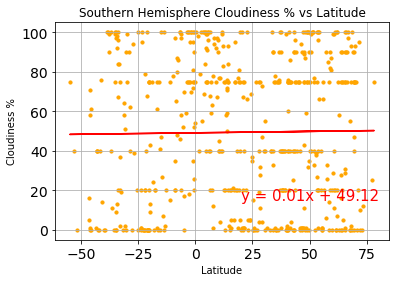

The r-squared is: 0.013225145468481015


In [51]:
#Southern Hemisphere Cloudiness vs Latitude scatterplot
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Cloudiness'].astype('float')
plt.scatter(x_axis, y_axis, c='orange', s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.savefig('Southern Hemisphere Cloudiness vs Latitude Regression.png')
plt.show()

# Print r square value
print(f"The r-squared is: {rvalue}")

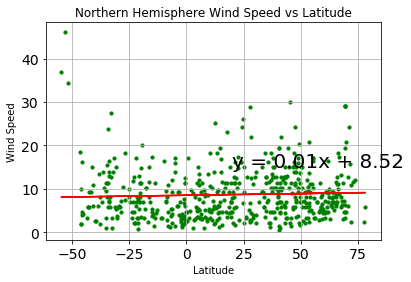

The r-squared is: 0.04482587031469757


In [52]:
#Northen Hemisphere Wind Speed vs Latitude scatterplot
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Wind Speed'].astype('float')
plt.scatter(x_axis, y_axis, c='green', s=10)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=20,color="black")

plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.savefig('Northern Hemisphere Wind Speed vs Latitude Regression.png')
plt.show()

# Print r square value
print(f"The r-squared is: {rvalue}")

The r-squared is: 0.04482587031469757


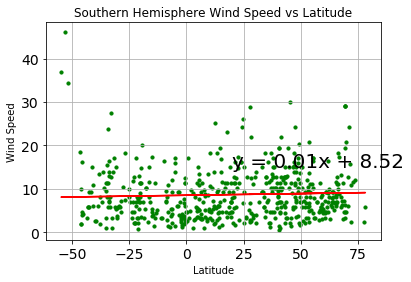

In [53]:
#Southern Hemisphere Wind Speed vs Latitude scatterplot
x_axis = cities_df['Lat'].astype('float')
y_axis = cities_df['Wind Speed'].astype('float')


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, c='green', s=10)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=20,color="black")

plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.savefig('Southern Hemisphere Wind Speed vs Latitude Regression.png')


# Print r square value
print(f"The r-squared is: {rvalue}")
plt.show()

### Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)
len(countries)

616

In [42]:
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,humaita,,BR,,,,,,
1,nishihara,,JP,,,,,,
2,kozloduj,,BG,,,,,,
3,fortuna,,US,,,,,,
4,hasaki,,JP,,,,,,


In [43]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')



-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Humaitá
Processing Weather Data for Record 2 of Set 1 | Nishihara
City not found....Skipping............
Processing Weather Data for Record 3 of Set 1 | Fortuna
Processing Weather Data for Record 4 of Set 1 | Hasaki
Processing Weather Data for Record 5 of Set 1 | Kaitangata
City not found....Skipping............
Processing Weather Data for Record 6 of Set 1 | Sørland
City not found....Skipping............
Processing Weather Data for Record 7 of Set 1 | Hobyo
Processing Weather Data for Record 8 of Set 1 | Daru
Processing Weather Data for Record 9 of Set 1 | Yellowknife
Processing Weather Data for Record 10 of Set 1 | Vardø
Processing Weather Data for Record 11 of Set 1 | Necochea
Processing Weather Data for Record 12 of Set 1 | Monrovia
Processing Weather Data for Record 13 of Set 1 | Saskylakh
City not found....Skipping............
Processing Weather Da

In [45]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,humaita,96,BR,1586480289,94,-7.51,-63.02,76.86,1.86
1,nishihara,20,JP,1586480289,72,26.18,127.76,71.60,10.29
3,fortuna,75,US,1586480290,76,40.6,-124.16,59.00,13.87
4,hasaki,75,JP,1586480290,58,35.73,140.83,57.00,10.29
5,kaitangata,39,NZ,1586480290,59,-46.28,169.85,60.78,3.15
